# EDA fuga de empleados

### Librerias a importar

In [1]:
# librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Abrir el archivo y conversion a dataframe

In [2]:
directorio_trabajo = "C:/Users/guzma/Documents/Machine-Learning-Python-main/data/processed"
try:
    os.chdir(directorio_trabajo)
    print(f"Directorio de trabajo cambiado a: {os.getcwd()}") 
except FileNotFoundError:
    print(f"Error: El directorio '{directorio_trabajo}' no fue encontrado. Verifica la ruta.")

Directorio de trabajo cambiado a: C:\Users\guzma\Documents\Machine-Learning-Python-main\data\processed


In [15]:
# abrir el dataframe
df = pd.read_csv("HR_comma_sep.csv", sep=";")

#analisis de las variables.
print("\nAnalisis Preliminar del dataframe")
print("\nInformacion del dataframe\n")
df.info()
print("\nDimension del Dataframe")
print(df.shape)
print("\nAnalisis descriptivo variables")
df.describe(include='all')


Analisis Preliminar del dataframe

Informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14856 non-null  float64
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 1.1+ MB

Dimension del Dataframe
(14999, 10)

Analisis descriptivo variables


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14856.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.802369,201.050337,3.841189,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.230482,49.943099,40.841188,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


## Analisis preliminar

Con un analisis preliminar de los datos podemos ver que las variables de Work_accident, left, promotion_last_5years, Department y salary son factores, por lo cual se deben convertir.

adicionalmente se nota un outlier en la variable de time_spend_company

In [17]:
columnas_a_factor = ['Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']
for col in columnas_a_factor:
        if col in df.columns:
            df[col] = df[col].astype('category')
        else:
            print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

print("\nInformación del DataFrame después de convertir a categórico:")
df.describe(include='all')


Información del DataFrame después de convertir a categórico:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14856.000000,14999.000000,14999.000000,14999.0,14999.0,14999.0,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,10,3
top,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,sales,low
freq,NaN,NaN,NaN,NaN,NaN,12830.0,11428.0,14680.0,4140,7316
mean,0.612834,0.716102,3.802369,201.050337,3.841189,NaN,NaN,NaN,NaN,NaN
std,0.248631,0.171169,1.230482,49.943099,40.841188,NaN,NaN,NaN,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,NaN,NaN,NaN,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,NaN,NaN,NaN,NaN,NaN


In [18]:
#remplazo los valores faltanes
mean_number_project = df['number_project'].mean()
df['number_project'].fillna(mean_number_project, inplace=True)

C:\Users\guzma\AppData\Local\Temp\ipykernel_12012\3314207214.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_project'].fillna(mean_number_project, inplace=True)



Tratamiento de outliers para 'time_spend_company':


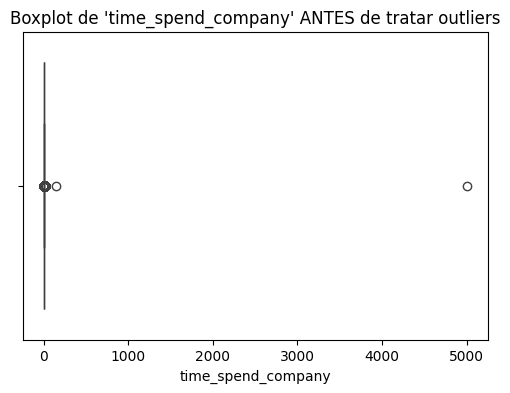

Q1: 3.0, Q3: 4.0, IQR: 1.0
Límite inferior para outliers: 1.5
Límite superior para outliers: 5.5
Número de valores por encima del límite superior modificados: 1284
Número de valores por debajo del límite inferior modificados: 0


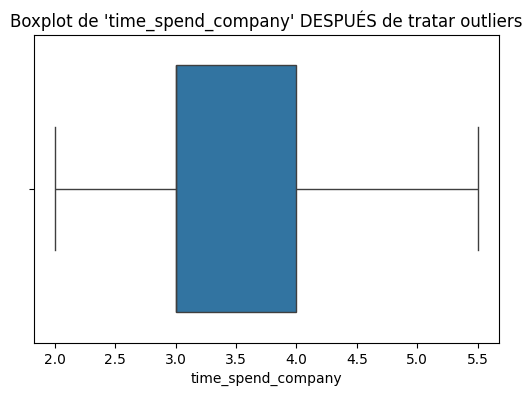

In [16]:
#imputacion de los valores atipicos.
# R: boxplot(df$time_spend_company)

if not df.empty and 'time_spend_company' in df.columns:
    print("\nTratamiento de outliers para 'time_spend_company':")
    plt.figure(figsize=(6,4)) # Opcional: ajustar tamaño de la figura
    sns.boxplot(x=df['time_spend_company'])
    plt.title("Boxplot de 'time_spend_company' ANTES de tratar outliers")
    plt.show() # Muestra el gráfico

    #coloco los rangos intercuartiles
    # R: Q1 <- quantile(df$time_spend_company, 0.25)
    # R: Q2 <- quantile(df$time_spend_company, 0.75) # En R, Q2 es la mediana, pero aquí se usa para Q3.
                                                 # En pandas .quantile(0.75) es Q3.
    Q1 = df['time_spend_company'].quantile(0.25)
    Q3 = df['time_spend_company'].quantile(0.75) # Usamos Q3 para el tercer cuartil

    #coloco el rango intercuartil
    # R: iqr <- Q2 - Q1
    iqr = Q3 - Q1

    #Hago los limites superiores e inferiores
    # R: superior <- Q2 + iqr*1.5
    # R: inferior <- Q1 - iqr*1.5
    superior = Q3 + iqr * 1.5
    inferior = Q1 - iqr * 1.5

    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {iqr}")
    print(f"Límite inferior para outliers: {inferior}")
    print(f"Límite superior para outliers: {superior}")

    #la imputacion de los valores atipicos
    # R: df$time_spend_company[df$time_spend_company>superior] <- superior
    # Aplicamos el capping para valores superiores.
    # También es buena práctica considerar el límite inferior, aunque en 'time_spend_company' podría no ser un problema
    # si los valores son todos positivos y el límite inferior es negativo.

    # Guardamos los valores originales para comparar cuántos se modificaron
    original_values_above = df['time_spend_company'] > superior
    original_values_below = df['time_spend_company'] < inferior
    
    # Usamos np.where o df.loc para la asignación condicional
    # df.loc[df['time_spend_company'] > superior, 'time_spend_company'] = superior
    # df.loc[df['time_spend_company'] < inferior, 'time_spend_company'] = inferior
    
    # O con np.where (más versátil para múltiples condiciones si fuera necesario):
    df['time_spend_company'] = np.where(df['time_spend_company'] > superior, superior, df['time_spend_company'])
    df['time_spend_company'] = np.where(df['time_spend_company'] < inferior, inferior, df['time_spend_company'])

    print(f"Número de valores por encima del límite superior modificados: {original_values_above.sum()}")
    print(f"Número de valores por debajo del límite inferior modificados: {original_values_below.sum()}")

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['time_spend_company'])
    plt.title("Boxplot de 'time_spend_company' DESPUÉS de tratar outliers")
    plt.show()
else:
    if df.empty:
        print("\nEl DataFrame está vacío, no se puede tratar outliers.")
    else:
        print("\nLa columna 'time_spend_company' no existe, no se puede tratar outliers.")


Calculando correlación para las columnas: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

Matriz de Correlación:
                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.139709   
last_evaluation                 0.105021         1.000000        0.346333   
number_project                 -0.139709         0.346333        1.000000   
average_montly_hours           -0.020048         0.339742        0.413169   
time_spend_company             -0.151832         0.170101        0.260896   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.151832  
last_evaluation                   0.339742            0.170101  
number_project                    0.413169            0.260896  
average_montly_hours              1.000000            0.172254  
time_spend_company                0.172

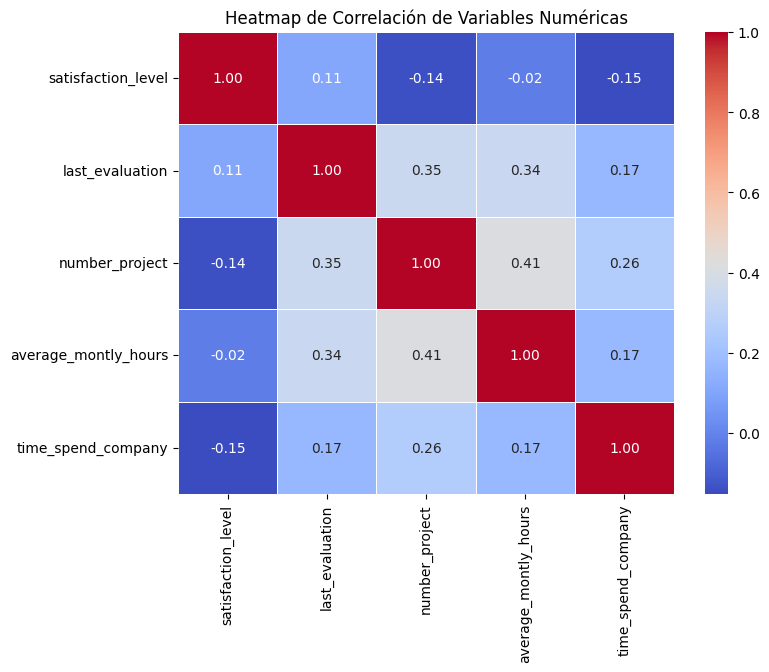

In [17]:
#hago un analisis de correlacion
# R: matriz_correlacion <- cor(df %>% select(satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company))
# R: matriz_correlacion
# R: corrplot(matriz_correlacion)

if not df.empty:
    columnas_para_correlacion = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
    
    # Asegurarse de que todas las columnas existen antes de intentar la correlación
    columnas_existentes_para_correlacion = [col for col in columnas_para_correlacion if col in df.columns]
    
    if len(columnas_existentes_para_correlacion) < 2:
        print("\nNo hay suficientes columnas numéricas existentes para calcular la correlación.")
    else:
        print(f"\nCalculando correlación para las columnas: {columnas_existentes_para_correlacion}")
        # En pandas, seleccionas las columnas primero, luego aplicas .corr()
        # df[lista_de_columnas] es como df %>% select(...)
        matriz_correlacion = df[columnas_existentes_para_correlacion].corr()

        print("\nMatriz de Correlación:")
        print(matriz_correlacion)

        # Visualizar la matriz de correlación con un heatmap de Seaborn
        plt.figure(figsize=(8, 6)) # Ajustar tamaño para mejor visualización
        sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        # annot=True: muestra los valores de correlación en las celdas
        # cmap='coolwarm': esquema de color (azul-blanco-rojo es común para correlaciones)
        # fmt=".2f": formatea los números a dos decimales
        # linewidths: añade líneas entre celdas
        plt.title("Heatmap de Correlación de Variables Numéricas")
        plt.show()
else:
    print("\nEl DataFrame está vacío, no se puede calcular la correlación.")

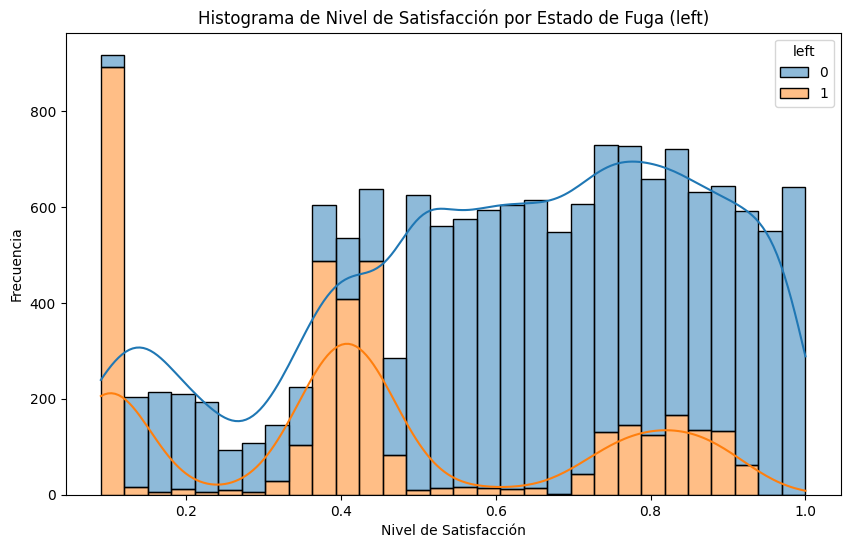

In [18]:
#histograma de por que los empleados se fugan
# R: ggplot(df, aes(x = satisfaction_level, fill = left)) + geom_histogram()

if not df.empty and 'satisfaction_level' in df.columns and 'left' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='satisfaction_level', hue='left', multiple='stack', kde=True, bins=30)
    # data=df: el DataFrame a usar
    # x='satisfaction_level': variable para el eje x
    # hue='left': variable para colorear las barras (similar a fill=left en ggplot)
    # multiple='stack': apila las barras para cada categoría de 'hue'. Otras opciones: 'layer', 'dodge', 'fill'
    # kde=True: añade una estimación de densidad kernel (opcional, pero útil)
    # bins=30: número de contenedores para el histograma
    plt.title("Histograma de Nivel de Satisfacción por Estado de Fuga (left)")
    plt.xlabel("Nivel de Satisfacción")
    plt.ylabel("Frecuencia")
    plt.show()
else:
    print("\nNo se pueden generar gráficos, DataFrame vacío o columnas faltantes.")

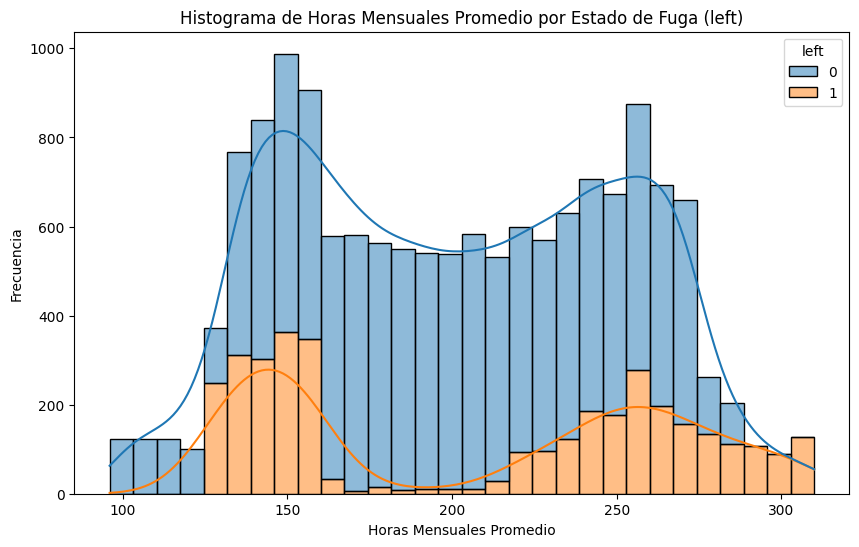

In [19]:
#veo la cantidad de horas trabajadas al mes
# R: ggplot(df, aes(x = average_montly_hours, fill = left)) + geom_histogram()

if not df.empty and 'average_montly_hours' in df.columns and 'left' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='average_montly_hours', hue='left', multiple='stack', kde=True, bins=30)
    plt.title("Histograma de Horas Mensuales Promedio por Estado de Fuga (left)")
    plt.xlabel("Horas Mensuales Promedio")
    plt.ylabel("Frecuencia")
    plt.show()
else:
    print("\nNo se pueden generar gráficos, DataFrame vacío o columnas faltantes.")

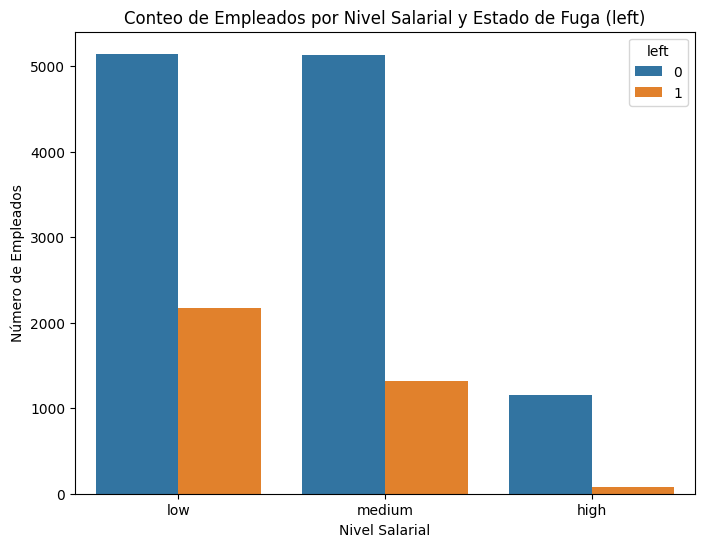

In [20]:
#veo el nivel de salario vs la variable left
# R: ggplot(df, aes(x = salary, fill = left)) + geom_bar()

if not df.empty and 'salary' in df.columns and 'left' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='salary', hue='left', order=['low', 'medium', 'high']) # 'order' para el eje x si es categórico con orden
    # x='salary': la variable categórica para el eje x
    # hue='left': la variable para agrupar y colorear las barras
    # order: especifica el orden de las categorías en el eje x
    plt.title("Conteo de Empleados por Nivel Salarial y Estado de Fuga (left)")
    plt.xlabel("Nivel Salarial")
    plt.ylabel("Número de Empleados")
    plt.show()
else:
    print("\nNo se pueden generar gráficos, DataFrame vacío o columnas faltantes.")

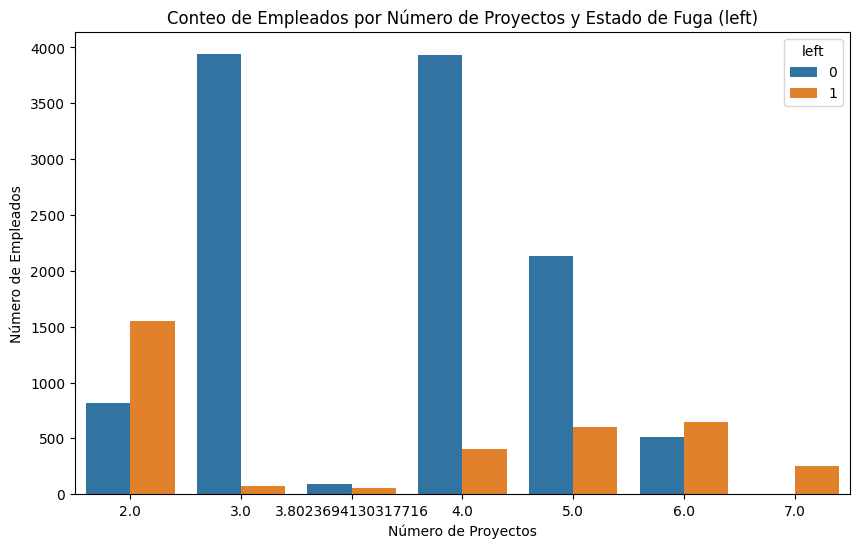

In [21]:
#veo el nivel de salario vs la variable left (en R es number_project)
# R: ggplot(df, aes(x = number_project, fill = left)) + geom_bar()

if not df.empty and 'number_project' in df.columns and 'left' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='number_project', hue='left')
    plt.title("Conteo de Empleados por Número de Proyectos y Estado de Fuga (left)")
    plt.xlabel("Número de Proyectos")
    plt.ylabel("Número de Empleados")
    plt.show()
else:
    print("\nNo se pueden generar gráficos, DataFrame vacío o columnas faltantes.")